___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# Ingest the data to notebook

In [4]:
df = pd.read_csv('heart.csv')

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


<AxesSubplot:>

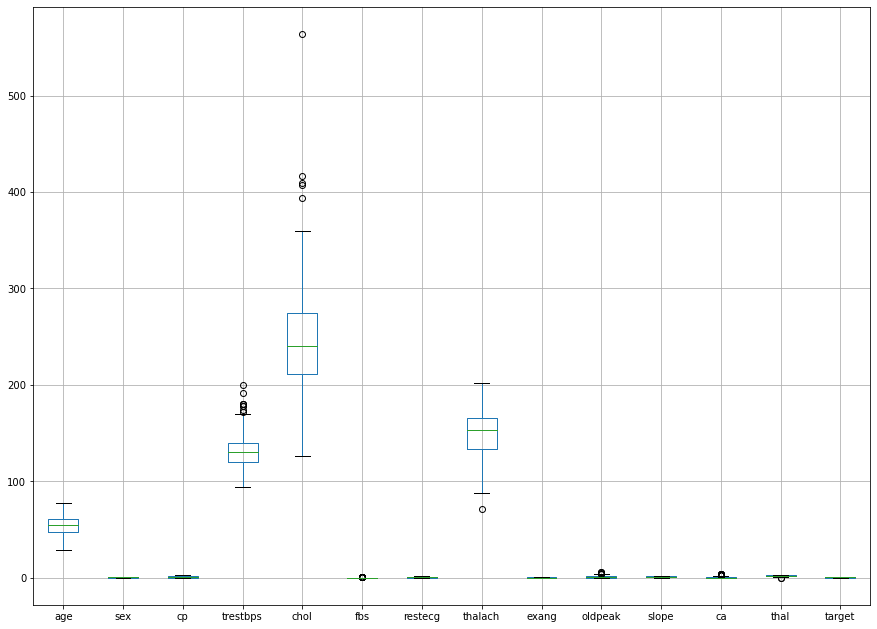

In [9]:
df.boxplot(figsize=(15,11))

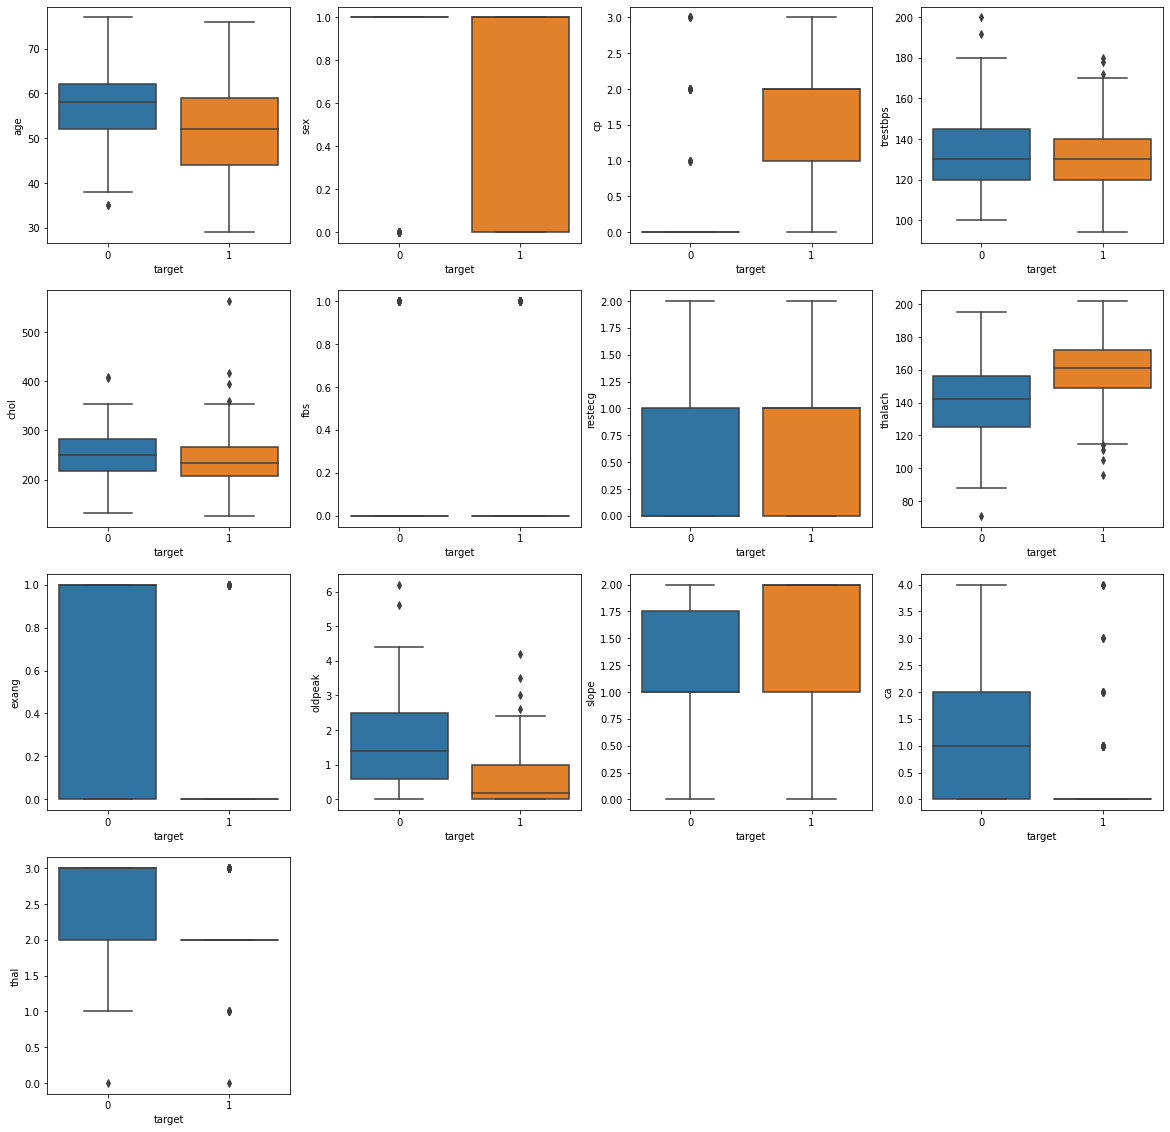

In [10]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:xlabel='fbs'>

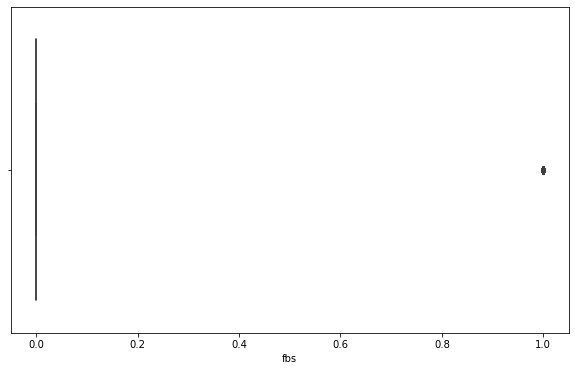

In [11]:
sns.boxplot(df.fbs)

In [12]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:xlabel='ca'>

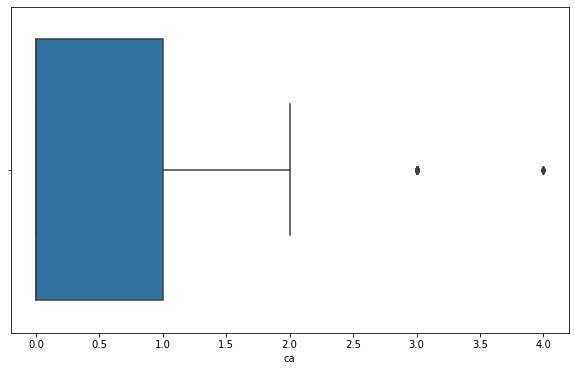

In [13]:
sns.boxplot(df.ca)

In [14]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='cp'>

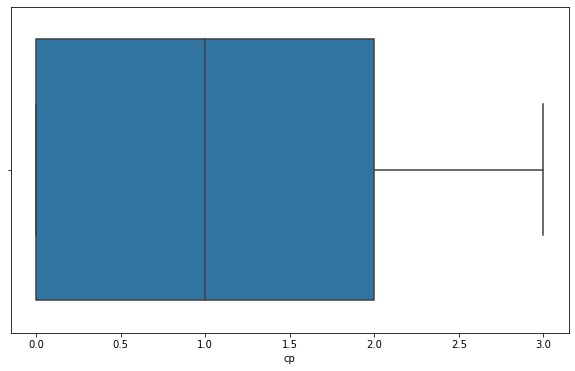

In [15]:
sns.boxplot(df.cp)

In [16]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='sex'>

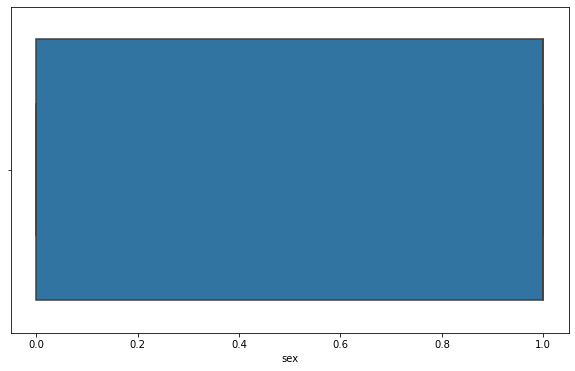

In [17]:
sns.boxplot(df.sex)

In [18]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [20]:
df[df['sex']==0]['age'].value_counts()

62    7
58    6
63    5
54    5
41    4
60    4
55    4
57    4
65    4
51    4
53    3
64    3
67    3
45    3
71    3
66    3
50    3
46    3
56    3
44    2
61    2
43    2
42    2
49    2
39    2
52    1
76    1
74    1
68    1
34    1
37    1
48    1
69    1
35    1
59    1
Name: age, dtype: int64

In [21]:
df[df['sex']==1]['age'].value_counts()

57    13
59    13
58    13
52    12
54    11
44     9
51     8
56     8
60     7
64     7
42     6
48     6
41     6
61     6
67     6
43     6
53     5
45     5
47     5
46     4
50     4
63     4
65     4
62     4
66     4
70     4
55     4
38     3
68     3
40     3
49     3
35     3
39     2
69     2
29     1
34     1
37     1
77     1
Name: age, dtype: int64

<AxesSubplot:>

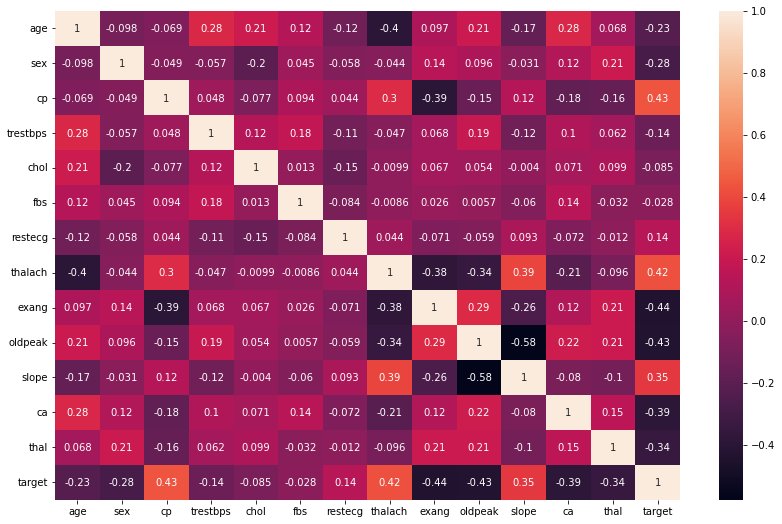

In [22]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), annot=True)

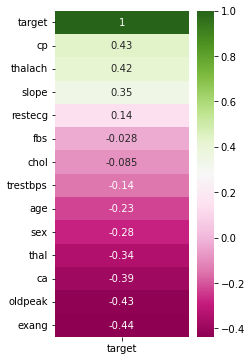

In [24]:
plt.figure(figsize=(3,6))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), 
            vmax = 1,
            annot=True, 
            cmap="PiYG")
plt.show()

<AxesSubplot:>

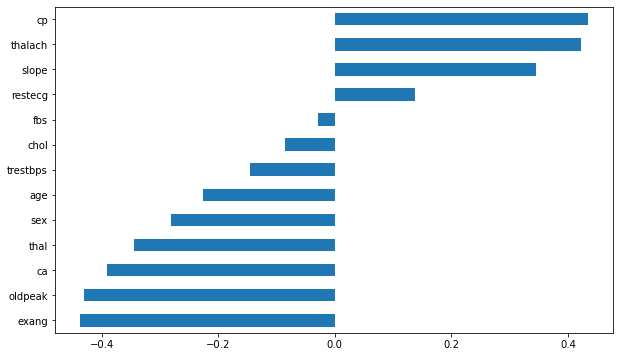

In [25]:
df.corr()["target"].drop("target").sort_values().plot.barh()

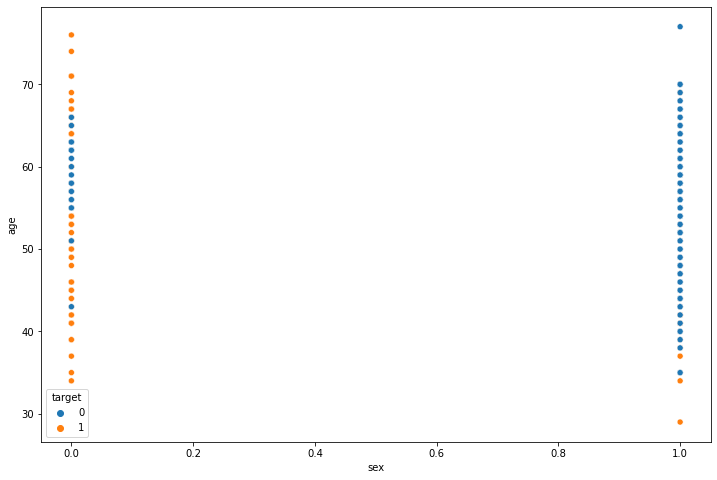

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='age', x='sex', data=df, hue='target');

# Data Preprocessing

In [28]:
X = df.drop('target',axis=1)
y = df['target']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)

In [34]:
X_test_scaled = scaler.transform(X_test)

In [35]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (242, 13)
Train target shape   :  (242,)
Test features shape  :  (61, 13)
Test target shape    :  (61,)


# Implement Logistic Regression and Evaluate

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model=LogisticRegression()

In [38]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [40]:
log_model.coef_

array([[-0.08549335, -0.78306451,  0.81800359, -0.27349329, -0.17508509,
         0.09046532,  0.28414084,  0.39518149, -0.51749088, -0.68097827,
         0.43552474, -0.79012711, -0.56558958]])

In [41]:
log_model.intercept_

array([0.17903657])

In [42]:
y_pred = log_model.predict(X_test_scaled) # Bu işlem bize test için ayrılmış bölümün prediction'larını veriyor.
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
y_pred_proba = log_model.predict_proba(X_test_scaled) # prediction'ları olasılık olarak elde ediyoruz. 
y_pred_proba

array([[0.92077874, 0.07922126],
       [0.34225061, 0.65774939],
       [0.15333014, 0.84666986],
       [0.97843781, 0.02156219],
       [0.03927479, 0.96072521],
       [0.09944445, 0.90055555],
       [0.37077667, 0.62922333],
       [0.99855189, 0.00144811],
       [0.99500494, 0.00499506],
       [0.54779646, 0.45220354],
       [0.23118806, 0.76881194],
       [0.94578013, 0.05421987],
       [0.09568072, 0.90431928],
       [0.96164597, 0.03835403],
       [0.00882101, 0.99117899],
       [0.05602281, 0.94397719],
       [0.01074094, 0.98925906],
       [0.91518074, 0.08481926],
       [0.99379611, 0.00620389],
       [0.98912212, 0.01087788],
       [0.37965105, 0.62034895],
       [0.98875646, 0.01124354],
       [0.80301429, 0.19698571],
       [0.22365859, 0.77634141],
       [0.04337695, 0.95662305],
       [0.33118346, 0.66881654],
       [0.11304681, 0.88695319],
       [0.48478957, 0.51521043],
       [0.99258784, 0.00741216],
       [0.05374877, 0.94625123],
       [0.

In [44]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0
104,50,1,2,129,196,0,1,163,0,0.000,2,0,2,1
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
193,60,1,0,145,282,0,0,142,1,2.800,1,2,3,0


In [45]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.079
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0,0.658
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1,0.847
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0,0.022
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,0.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0,0.033
104,50,1,2,129,196,0,1,163,0,0.000,2,0,2,1,0.965
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0,0.015
193,60,1,0,145,282,0,0,142,1,2.800,1,2,3,0,0.003


In [46]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.079,0
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0,0.658,1
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1,0.847,1
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0,0.022,0
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,0.961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0,0.033,0
104,50,1,2,129,196,0,1,163,0,0.000,2,0,2,1,0.965,1
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0,0.015,0
193,60,1,0,145,282,0,0,142,1,2.800,1,2,3,0,0.003,0


In [47]:
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
17,66,0,3,150,226,0,1,114,0,2.600,0,0,2,1,0.779,1
152,64,1,3,170,227,0,0,155,0,0.600,1,0,3,1,0.620,1
78,52,1,1,128,205,1,1,184,0,0.000,2,0,2,1,0.958,1
25,71,0,1,160,302,0,1,162,0,0.400,2,2,2,1,0.776,1
285,46,1,0,140,311,0,1,120,1,1.800,1,2,3,0,0.006,0
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.079,0
119,46,0,0,138,243,0,0,152,1,0.000,1,0,2,1,0.629,1
251,43,1,0,132,247,1,0,143,1,0.100,1,4,3,0,0.006,0
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0,0.022,0
198,62,1,0,120,267,0,1,99,1,1.800,1,2,3,0,0.006,0


In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve,plot_confusion_matrix

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("----------------------------------------------------------")
    print("                  Test_Set")
    print("----------------------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------")
    print("                 Train_Set")
    print("----------------------------------------------------------")
    print(confusion_matrix(y_train, y_train_pred))
    
    print(classification_report(y_train, y_train_pred))

In [51]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

----------------------------------------------------------
                  Test_Set
----------------------------------------------------------
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

----------------------------------------------------------
                 Train_Set
----------------------------------------------------------
[[ 87  22]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       109
           1       0.85      0.92      0.88       133

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242



## Grid

In [78]:
from sklearn.model_selection import GridSearchCV

In [88]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [89]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [90]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [91]:
grid_model.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [92]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



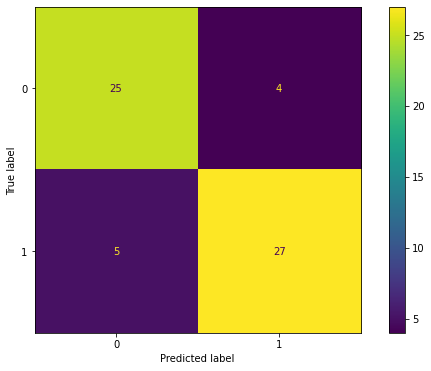

In [94]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
import math
math.sqrt(len(y))

17.406895185529212

In [58]:
error = []
for k in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(KNN, X, y, cv=10)
    error.append(mean_squared_error(y,y_pred)) 

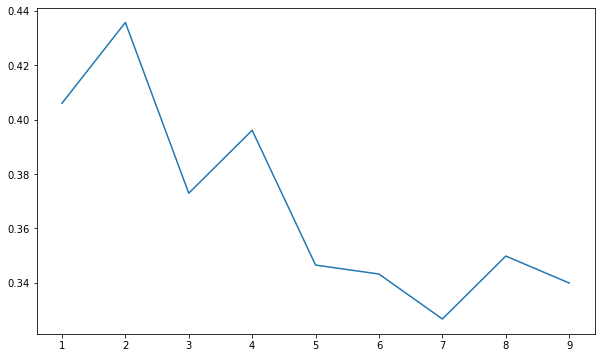

In [59]:
plt.plot(range(1,10),error)

In [60]:
math.sqrt(len(y_train))

15.556349186104045

In [61]:
math.sqrt(len(y_test))

7.810249675906654

In [62]:
KNN_model = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [63]:
KNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [65]:
y_pred = KNN_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
y_pred_proba = KNN_model.predict_proba(X_test_scaled)
y_pred_proba

array([[1.        , 0.        ],
       [0.57142857, 0.42857143],
       [0.14285714, 0.85714286],
       [0.85714286, 0.14285714],
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.14285714, 0.85714286],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [1.

In [67]:
test_data_KNN = pd.concat([X_test, y_test], axis=1)
test_data_KNN

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0
104,50,1,2,129,196,0,1,163,0,0.000,2,0,2,1
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
193,60,1,0,145,282,0,0,142,1,2.800,1,2,3,0


In [68]:
test_data_KNN["pred_proba"] = y_pred_proba[:,1]
test_data_KNN

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.000
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0,0.429
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1,0.857
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0,0.143
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0,0.143
104,50,1,2,129,196,0,1,163,0,0.000,2,0,2,1,0.857
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0,0.286
193,60,1,0,145,282,0,0,142,1,2.800,1,2,3,0,0.000


In [69]:
test_data_KNN["pred"] = y_pred
test_data_KNN

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.000,0
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0,0.429,0
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1,0.857,1
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0,0.143,0
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,0.857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0,0.143,0
104,50,1,2,129,196,0,1,163,0,0.000,2,0,2,1,0.857,1
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0,0.286,0
193,60,1,0,145,282,0,0,142,1,2.800,1,2,3,0,0.000,0


In [70]:
test_data_KNN.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
279,61,1,0,138,166,0,0,125,1,3.600,1,1,2,0,0.000,0
232,55,1,0,160,289,0,0,145,1,0.800,1,1,3,0,0.000,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0,0.286,0
285,46,1,0,140,311,0,1,120,1,1.800,1,2,3,0,0.000,0
236,58,1,0,125,300,0,0,171,0,0.000,2,2,3,0,0.429,0
109,50,0,0,110,254,0,0,159,0,0.000,2,0,2,1,0.857,1
249,69,1,2,140,254,0,0,146,0,2.000,1,3,3,0,0.143,0
46,44,1,2,140,235,0,0,180,0,0.000,2,0,2,1,1.000,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0,0.286,0
17,66,0,3,150,226,0,1,114,0,2.600,0,0,2,1,0.571,1


In [71]:
eval_metric(KNN_model, X_train_scaled, y_train, X_test_scaled, y_test)

----------------------------------------------------------
                  Test_Set
----------------------------------------------------------
[[27  2]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

----------------------------------------------------------
                 Train_Set
----------------------------------------------------------
[[ 87  22]
 [ 10 123]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.85      0.92      0.88       133

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242



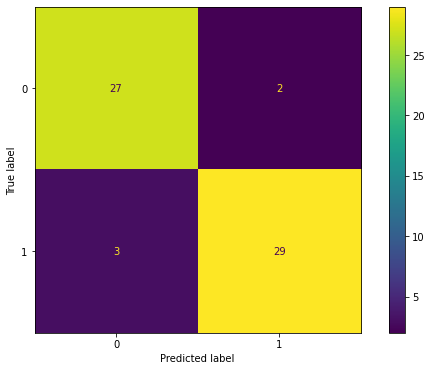

In [73]:
plot_confusion_matrix(KNN_model, X_test_scaled, y_test);

## KNN Grid

In [74]:
KNN_grid = KNeighborsClassifier()

In [75]:
k_values = range(1,30)

In [76]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [80]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring= 'accuracy')

In [81]:
KNN_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
KNN_grid_model.best_params_

{'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}

In [85]:
y_pred = KNN_grid_model.predict(X_test_scaled)

In [86]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26  3]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



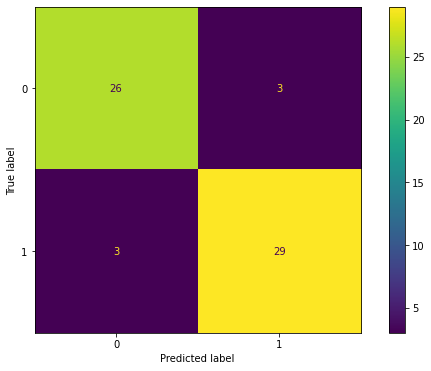

In [87]:
plot_confusion_matrix(KNN_grid_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

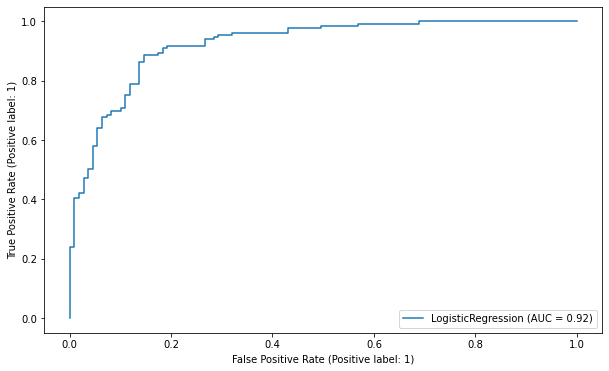

In [95]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [96]:
y_pred_proba = KNN_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9337794026350279

In [97]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [98]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5714285714285714

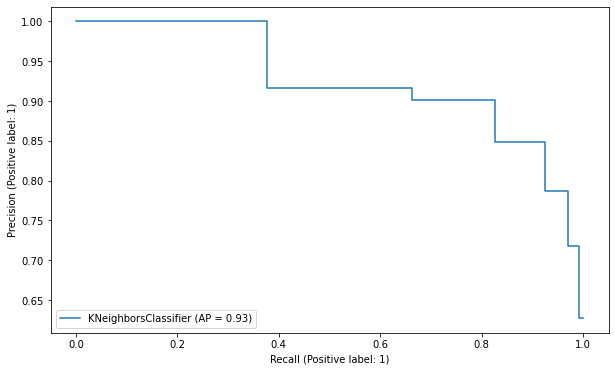

In [99]:
plot_precision_recall_curve(KNN_model, X_train_scaled, y_train);

In [100]:
y_pred_proba = KNN_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9262859376897131

In [101]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [102]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5714285714285714

# Chose best model and make a random prediction 

In [103]:
final_X_scaled = scaler.fit_transform(X)

In [104]:
final_KNN_model = KNeighborsClassifier(n_neighbors = 12, p = 1, weights = 'distance')

In [106]:
final_KNN_model.fit(final_X_scaled,y)

KNeighborsClassifier(n_neighbors=12, p=1, weights='distance')

In [107]:
values = [[25,0,2,180,200,0,0,200,1,1.8,1,1,0]]

In [108]:
final_KNN_model.predict(values)

array([1], dtype=int64)